In [2]:
# Carga todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('Files/datasets/input/megaline_calls.csv')
internet_df = pd.read_csv('Files/datasets/input/megaline_internet.csv')
messages_df = pd.read_csv('Files/datasets/input/megaline_messages.csv')
plans_df = pd.read_csv('Files/datasets/input/megaline_plans.csv')
users_df = pd.read_csv('Files/datasets/input/megaline_users.csv')

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [5]:
# Imprime una muestra de los datos para las tarifas
display(plans_df.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
# Transforma los valores de megabytes a gigabytes en la columna 'mb_per_month_included'
plans_df['mb_per_month_included'] = plans_df['mb_per_month_included'] / 1024

# Convierte los valores de gigabytes a números enteros
plans_df['mb_per_month_included'] = plans_df['mb_per_month_included'].astype(int)

# Renombra la columna a 'gb_per_month_included'
plans_df.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)

In [7]:
# Usar el método 'value_counts' para contar usuarios por plan
user_counts_by_plan = users_df['plan'].value_counts()
print(user_counts_by_plan)

plan
surf        339
ultimate    161
Name: count, dtype: int64


In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [9]:
# Imprime una muestra de datos para usuarios
display(users_df.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [10]:
# Llena los valores nulos
users_df['churn_date'].fillna('Active user', inplace=True)

# Extrae los datos después de la coma en 'city' y guardarlos en 'region'
users_df['region'] = users_df['city'].str.extract(r',\s(.*?)\s')

# Elimina los datos originales en 'city'
users_df['city'] = users_df['city'].str.replace(',\s.*', '', regex=True)

# Reorganiza las columnas 
users_df = users_df[['user_id', 'first_name', 'last_name', 'age', 'city', 'region', 'reg_date', 'plan', 'churn_date']]

# Muestra los datos
display(users_df.head())

,user_id,first_name,last_name,age,city,region,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,GA,2018-12-24,ultimate,Active user
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,WA,2018-08-13,surf,Active user
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,NV,2018-10-21,surf,Active user
3,1003,Reynaldo,Jenkins,52,Tulsa,OK,2018-01-28,surf,Active user
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,WA,2018-05-23,surf,Active user


In [11]:
# Combierte al tipo de dato datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [13]:
# Imprime una muestra de datos para las llamadas
display(calls_df.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [14]:
# Redondea al número mayor
calls_df['duration'] = np.ceil(calls_df['duration']).astype(int)

In [15]:
# Combierte al tipo de dato datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Crea una nueva columna llamada 'month_year' que contiene el nombre del mes y el año
calls_df['month_year'] = calls_df['call_date'].dt.to_period('M')

# Muestra los resultados
display(calls_df.head())

,id,user_id,call_date,duration,month_year
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [17]:
# Imprime una muestra de datos para los mensajes
display(messages_df.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
# Combierte al tipo de dato datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

In [19]:
# Crea una nueva columna llamada 'month_year' que contiene el nombre del mes y el año
messages_df['month_year'] = messages_df['message_date'].dt.to_period('M')

# Muestra los resultados
display(messages_df.head())

,id,user_id,message_date,month_year
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [21]:
# Imprime una muestra de datos para el tráfico de internet
display(internet_df.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [22]:
# Divide los valores de la columna 'mb_used' por 1024 para convertir a gigabytes
internet_df['gb_used'] = internet_df['mb_used'] / 1024

# Elimina la columna original 'mb_used'
internet_df.drop(columns=['mb_used'], inplace=True)

# Muestra los resultados
display(internet_df.head())

,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,0.087754
1,1000_204,1000,2018-12-31,0.000000
2,1000_379,1000,2018-12-28,0.644922
3,1000_413,1000,2018-12-26,0.264639
4,1000_442,1000,2018-12-27,0.859590


In [23]:
# Combierte al tipo de dato datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# Crea una nueva columna llamada 'month_year' que contiene el nombre del mes y el año
internet_df['month_year'] = internet_df['session_date'].dt.to_period('M')

# Muestra los resultados
display(internet_df.head())

,id,user_id,session_date,gb_used,month_year
0,1000_13,1000,2018-12-29,0.087754,2018-12
1,1000_204,1000,2018-12-31,0.000000,2018-12
2,1000_379,1000,2018-12-28,0.644922,2018-12
3,1000_413,1000,2018-12-26,0.264639,2018-12
4,1000_442,1000,2018-12-27,0.859590,2018-12


In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans_df)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Extrae el mes y el año de la fecha de llamada
calls_df['month_year'] = calls_df['call_date'].dt.to_period('M')

# Calcula el número de llamadas por usuario y mes
calls_per_month = calls_df.groupby(['user_id', 'month_year']).size().reset_index(name='calls_made')
display(calls_per_month.head())

,user_id,month_year,calls_made
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls_df.groupby(['user_id', 'month_year'])['duration'].sum().reset_index(name='minutes_used')
display(minutes_per_month.head())

,user_id,month_year,minutes_used
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Extrae el mes y el año de la fecha del mensaje
messages_df['month_year'] = messages_df['message_date'].dt.to_period('M')

# Calcula el número de mensajes enviados por usuario y mes
messages_per_month = messages_df.groupby(['user_id', 'month_year']).size().reset_index(name='messages_sent')
display(messages_per_month.head())

,user_id,month_year,messages_sent
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Extrae el mes y el año de la fecha de cada sesión de Internet
internet_df['month_year'] = internet_df['session_date'].dt.to_period('M')

# Calcula el número de gigabites usados por usuario y mes
internet_usage_per_month = internet_df.groupby(['user_id', 'month_year'])['gb_used'].sum().reset_index()
internet_usage_per_month.columns = ['user_id', 'month_year', 'internet_data_used']

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Fusiona los datos de llamadas y minutos
merged_calls = calls_df.merge(minutes_per_month, on=['user_id', 'month_year'])

# Fusiona los datos de mensajes
merged_messages = merged_calls.merge(messages_per_month, on=['user_id', 'month_year'])

# Fusiona los datos de Internet
merged_internet = merged_messages.merge(internet_usage_per_month, on=['user_id', 'month_year'])

# Redondea al número más alto
merged_internet['internet_data_used'] = np.ceil(merged_internet['internet_data_used']).astype(int)
                             
display(merged_internet.head())

,id,user_id,call_date,duration,month_year,minutes_used,messages_sent,internet_data_used
0,1000_93,1000,2018-12-27,9,2018-12,124,11,2
1,1000_145,1000,2018-12-27,14,2018-12,124,11,2
2,1000_247,1000,2018-12-27,15,2018-12,124,11,2
3,1000_309,1000,2018-12-28,6,2018-12,124,11,2
4,1000_380,1000,2018-12-30,5,2018-12,124,11,2


In [30]:
# Añade la información de la tarifa
# Fusiona los DataFrames usando la columna 'user_id' como clave
merged_plans = merged_internet.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Fusiona los DataFrames en base a la columna 'plan_name' en plans_df y 'plan' en merged_plans
merged_df = pd.merge(merged_plans, plans_df, left_on='plan', right_on='plan_name', how='left')

# Elimina la columna duplicada 'plan_name' después de la fusión si es necesario
merged_df.drop('plan_name', axis=1, inplace=True)

display(merged_df.head())

,id,user_id,call_date,duration,month_year,minutes_used,messages_sent,internet_data_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000_93,1000,2018-12-27,9,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01
1,1000_145,1000,2018-12-27,14,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01
2,1000_247,1000,2018-12-27,15,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01
3,1000_309,1000,2018-12-28,6,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01
4,1000_380,1000,2018-12-30,5,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01


In [31]:
# Calcula el ingreso mensual para cada usuario
def monthly_income(row):
    plan_cost = row['usd_monthly_pay']
    messages_included = row['messages_included']
    gb_per_month_included = row['gb_per_month_included']
    minutes_included = row['minutes_included']
    messages_sent = row['messages_sent']
    internet_data_used = row['internet_data_used']
    minutes_used = row['minutes_used']
    
# Calcula los cargos adicionales por llamadas, mensajes y datos
    if minutes_used > minutes_included:
        minutes_extra = minutes_used - minutes_included
    else:
        minutes_extra = 0

    if messages_sent > messages_included:
        messages_extra = messages_sent - messages_included
    else:
        messages_extra = 0

    if internet_data_used > gb_per_month_included:
        data_extra = internet_data_used - gb_per_month_included
    else:
        data_extra = 0
    
# Calcula el ingreso total mensual
    total_income = plan_cost + (minutes_extra * row['usd_per_minute']) + (messages_extra * row['usd_per_message']) + (data_extra * row['usd_per_gb'])
    return total_income

# Aplica la función a cada fila del DataFrame y crear una nueva columna 'ingreso_mensual'
merged_df['total_income'] = merged_df.apply(monthly_income, axis=1)

# Redondea al número más alto
internet_df['gb_used'] = np.ceil(internet_df['gb_used'])

# Agrega la columna region del DataFrame user_df
merged_df = merged_df.merge(users_df[['user_id', 'region']], on='user_id', how='left')

display(merged_df.head())

,id,user_id,call_date,duration,month_year,minutes_used,messages_sent,internet_data_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_income,region
0,1000_93,1000,2018-12-27,9,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01,70.0,GA
1,1000_145,1000,2018-12-27,14,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01,70.0,GA
2,1000_247,1000,2018-12-27,15,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01,70.0,GA
3,1000_309,1000,2018-12-28,6,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01,70.0,GA
4,1000_380,1000,2018-12-30,5,2018-12,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01,70.0,GA


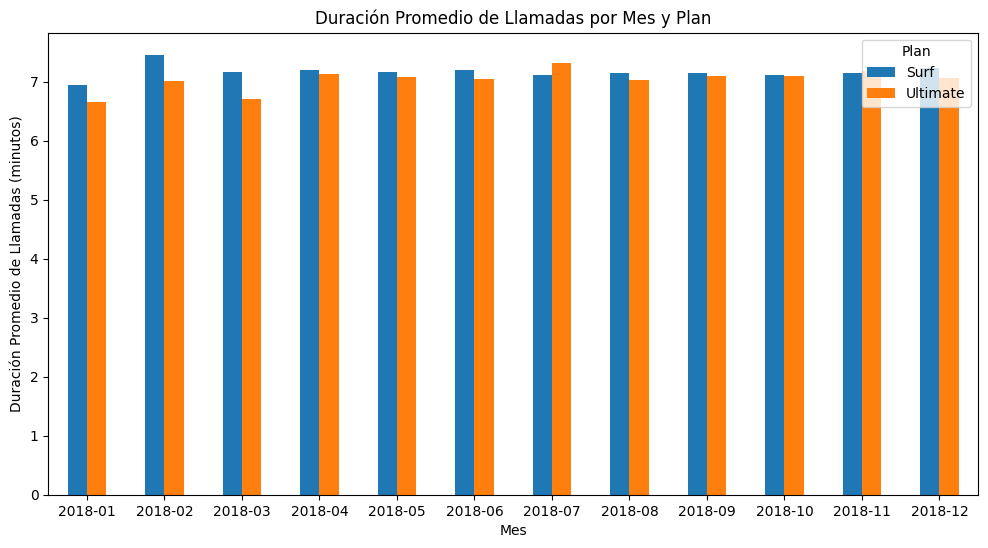

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla
# Filtra los datos para separar los usuarios por plan
surf_users = merged_df[merged_df['plan'] == 'surf']
ultimate_users = merged_df[merged_df['plan'] == 'ultimate']

# Calcula la duración promedio de llamadas por mes para cada plan
surf_avg_duration = surf_users.groupby('month_year')['duration'].mean()
ultimate_avg_duration = ultimate_users.groupby('month_year')['duration'].mean()

# Crea un DataFrame para los resultados
avg_duration_df = pd.DataFrame({'Surf Avg Duration': surf_avg_duration.values, 'Ultimate Avg Duration': ultimate_avg_duration.values},
                               index=surf_avg_duration.index)

# Plotea un gráfico de barras
avg_duration_df.plot( kind='bar', 
                      xlabel= 'Mes',
                      ylabel= 'Duración Promedio de Llamadas (minutos)',
                      title= 'Duración Promedio de Llamadas por Mes y Plan',
                      rot=0,
                      figsize=(12, 6))

# Agrega una leyenda al gráfico
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico en la pantalla
plt.show()

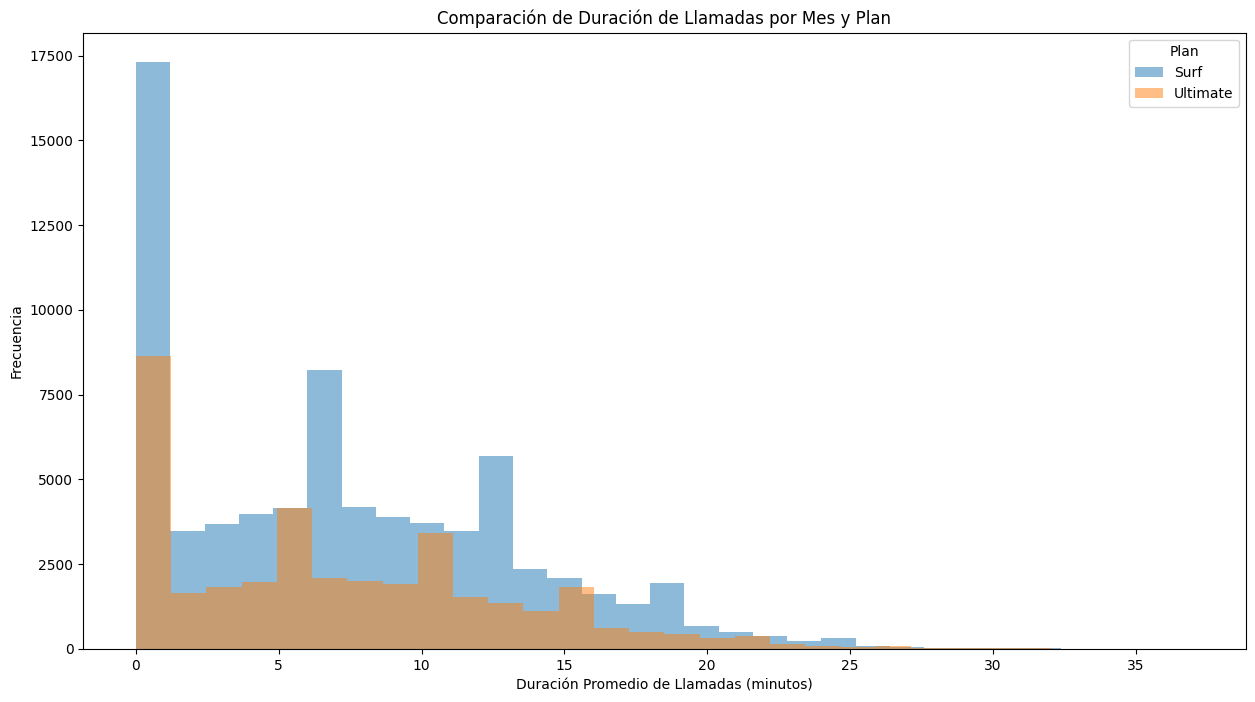

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_users['duration'].plot( kind='hist',
                             bins= 30, 
                             alpha= 0.5, 
                             title= 'Comparación de Duración de Llamadas por Mes y Plan',
                             xlabel= 'Duración Promedio de Llamadas (minutos)',
                             ylabel= 'Frecuencia',
                             figsize=(15, 8))
 
# Plotea un histograma
ultimate_users['duration'].plot( kind='hist',
                             bins= 30, 
                             alpha= 0.5, 
                             title= 'Comparación de Duración de Llamadas por Mes y Plan',
                             xlabel= 'Duración Promedio de Llamadas (minutos)',
                             ylabel= 'Frecuencia',
                             figsize=(15, 8))

# Agrega una leyenda al gráfico
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico en la pantalla
plt.show()

In [34]:
# Calcula la media de la duración mensual de llamadas.
surf_mean_duration = surf_users['duration'].mean()
ultimate_mean_duration = ultimate_users['duration'].mean()

# Calcula la varianza de la duración mensual de llamadas.
surf_variance_duration = surf_users['duration'].var()
ultimate_variance_duration = ultimate_users['duration'].var()

# Imprime los resultados calculados
print(f'Media de duración de llamadas para el plan Surf: {surf_mean_duration:.2f} minutos')
print(f'Media de duración de llamadas para el plan Ultimate: {ultimate_mean_duration:.2f} minutos')
print(f'Varianza de duración de llamadas para el plan Surf: {surf_variance_duration:.2f} minutos^2')
print(f'Varianza de duración de llamadas para el plan Ultimate: {ultimate_variance_duration:.2f} minutos^2')

Media de duración de llamadas para el plan Surf: 7.17 minutos
Media de duración de llamadas para el plan Ultimate: 7.10 minutos
Varianza de duración de llamadas para el plan Surf: 35.52 minutos^2
Varianza de duración de llamadas para el plan Ultimate: 35.31 minutos^2


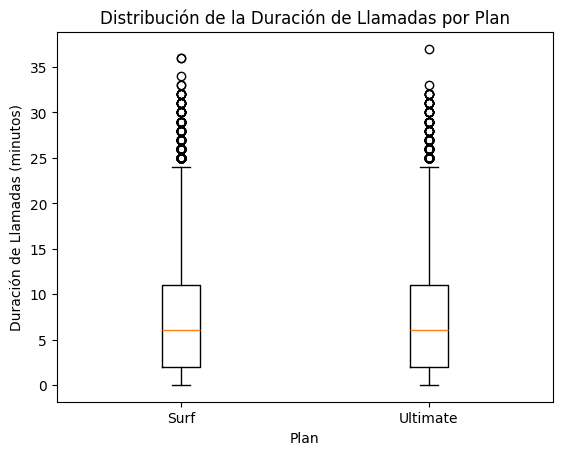

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Crea una lista con las duraciones de llamadas para cada plan
calls_monthly_distribution = [surf_users['duration'], ultimate_users['duration']]

# Crea un diagrama de caja (boxplot) con las duraciones de llamadas para los planes "Surf" y "Ultimate"
plt.boxplot(calls_monthly_distribution, vert=True, labels=['Surf', 'Ultimate'])

# Agrega etiquetas y un título al diagrama de caja
plt.xlabel('Plan')  
plt.ylabel('Duración de Llamadas (minutos)')  
plt.title('Distribución de la Duración de Llamadas por Plan') 

# Muestra el gráfico en la pantalla
plt.show()

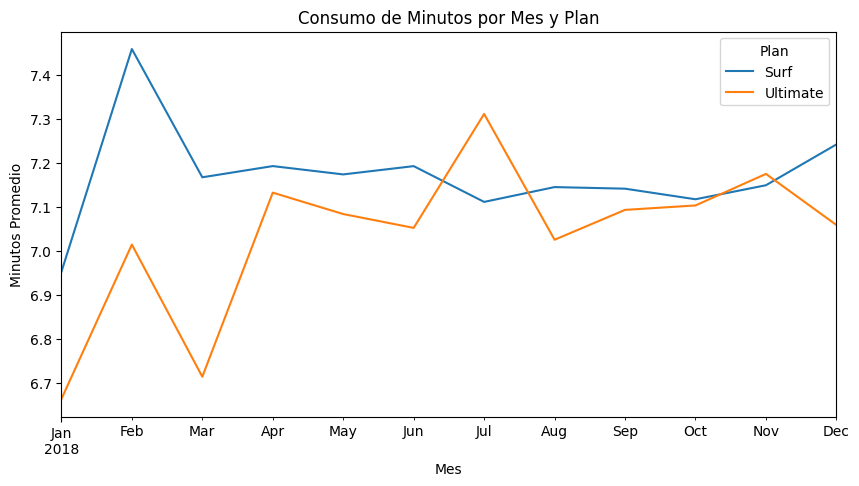

In [36]:
# Consumo de minutos en llamadas
# Llama al promedio mensual de minutos utilizados para los planes "Surf" y "Ultimate" y crea un gráfico de línea
avg_duration_df.plot(kind='line',
                        title='Consumo de Minutos por Mes y Plan',
                        xlabel='Mes',
                        ylabel='Minutos Promedio',
                        figsize=(10, 5))

# Agrega una leyenda al gráfico para identificar los planes
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico en la pantalla
plt.show()

In [37]:
# Descripción estadística del de minutos en llamadas para el plan 'Surf'
surf_calls_consumption_stats = surf_users[['minutes_used']].describe()

# Descripción estadística del de minutos en llamadas para el plan 'Ultimate'
ultimate_calls_consumption_stats = ultimate_users[['minutes_used']].describe()

# Imprimir resultados
print("Descripción estadística del de minutos en llamadas para el plan 'Surf':")
print(surf_calls_consumption_stats)

print("\nDescripción estadística del de minutos en llamadas para el plan 'Ultimate':")
print(ultimate_calls_consumption_stats)

Descripción estadística del de minutos en llamadas para el plan 'Surf':
       minutes_used
count  73392.000000
mean     564.375382
std      238.585936
min        2.000000
25%      408.000000
50%      533.000000
75%      676.000000
max     1510.000000

Descripción estadística del de minutos en llamadas para el plan 'Ultimate':
       minutes_used
count  36064.000000
mean     578.049468
std      260.563665
min        0.000000
25%      410.000000
50%      533.000000
75%      726.000000
max     1369.000000


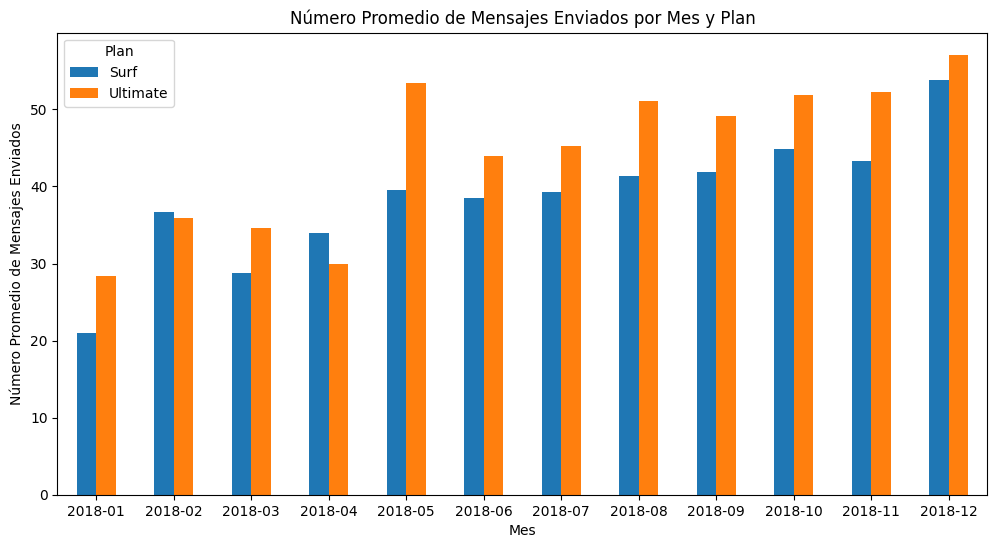

In [38]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Calcula el número promedio de mensajes enviados por mes para el plan "Surf"
surf_avg_messages = surf_users.groupby('month_year')['messages_sent'].mean()

# Calcula el número promedio de mensajes enviados por mes para el plan "Ultimate"
ultimate_avg_messages = ultimate_users.groupby('month_year')['messages_sent'].mean()

# Crea un DataFrame con los resultados de los promedios de mensajes enviados para ambos planes
avg_messages_df = pd.DataFrame({'Surf Avg Messages': surf_avg_messages.values, 
                                'Ultimate Avg Messages': ultimate_avg_messages.values},
                                index=surf_avg_messages.index)

# Crea un gráfico de barras para comparar los promedios de mensajes enviados por mes y plan
avg_messages_df.plot(kind='bar',
                     xlabel='Mes',  
                     ylabel='Número Promedio de Mensajes Enviados', 
                     title='Número Promedio de Mensajes Enviados por Mes y Plan', 
                     rot=0, 
                     figsize=(12, 6))  

# Agrega una leyenda al gráfico para identificar los planes "Surf" y "Ultimate"
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico en la pantalla
plt.show()

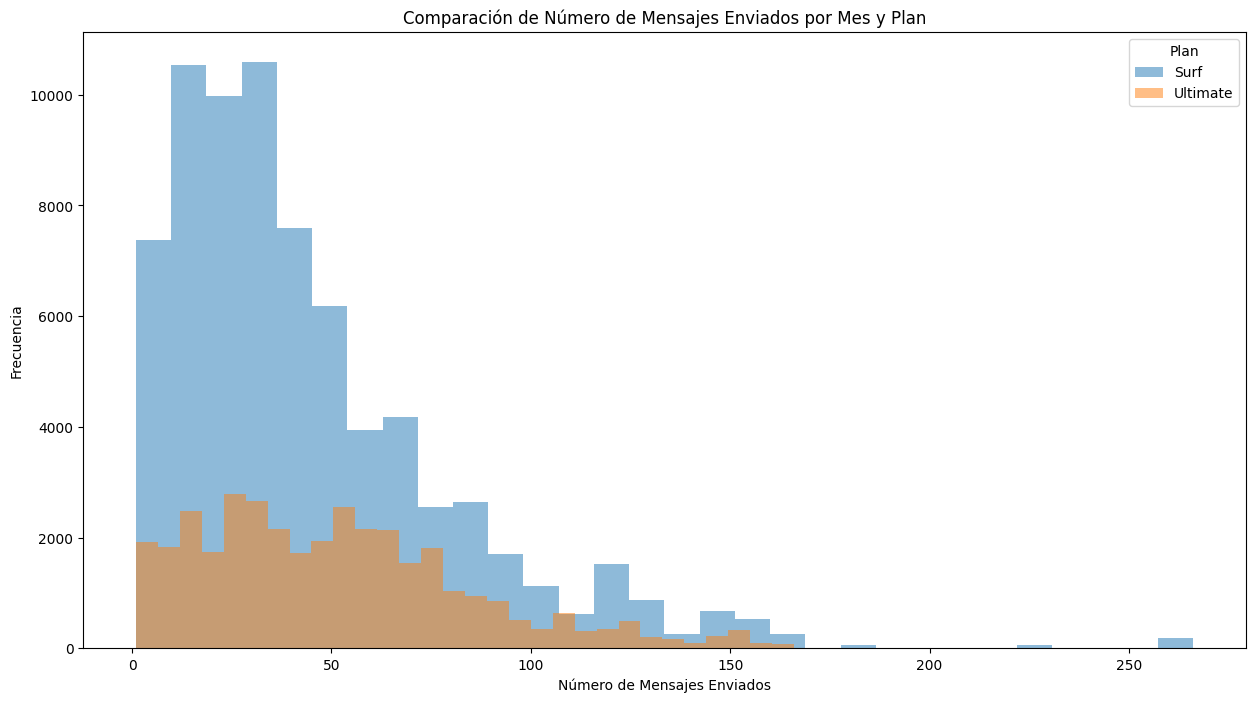

In [39]:
# Compara el número de mensajes enviados por mes para los usuarios de los planes "Surf" y "Ultimate"
# Crea un histograma para el plan "Surf"
surf_users['messages_sent'].plot( kind='hist',
                                  bins= 30,
                                  alpha= 0.5,
                                  title= 'Comparación de Número de Mensajes Enviados por Mes y Plan',
                                  xlabel= 'Número de Mensajes Enviados',
                                  ylabel= 'Frecuencia',
                                  figsize=(15, 8))

# Crea un histograma para el plan "Ultimate"
ultimate_users['messages_sent'].plot( kind='hist',
                                      bins= 30,
                                      alpha= 0.5,
                                      title= 'Comparación de Número de Mensajes Enviados por Mes y Plan',
                                      xlabel= 'Número de Mensajes Enviados',
                                      ylabel= 'Frecuencia',
                                      figsize=(15, 8))

# Agrega una leyenda al gráfico para identificar los planes "Surf" y "Ultimate"
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico en la pantalla
plt.show()

In [40]:
# Calcula la media del número mensual de mensajes enviados para los planes "Surf" y "Ultimate"
surf_mean_messages = surf_users['messages_sent'].mean()  # Media de mensajes para el plan "Surf"
ultimate_mean_messages = ultimate_users['messages_sent'].mean()  # Media de mensajes para el plan "Ultimate"

# Calcula la varianza del número mensual de mensajes enviados para los planes "Surf" y "Ultimate"
surf_variance_messages = surf_users['messages_sent'].var()  # Varianza de mensajes para el plan "Surf"
ultimate_variance_messages = ultimate_users['messages_sent'].var()  # Varianza de mensajes para el plan "Ultimate"

# Imprime los resultados de media y varianza para ambos planes
print(f'Media de mensajes enviados para el plan Surf: {surf_mean_messages:.2f} mensajes')
print(f'Media de mensajes enviados para el plan Ultimate: {ultimate_mean_messages:.2f} mensajes')
print(f'Varianza de mensajes enviados para el plan Surf: {surf_variance_messages:.2f} mensajes^2')
print(f'Varianza de mensajes enviados para el plan Ultimate: {ultimate_variance_messages:.2f} mensajes^2')

Media de mensajes enviados para el plan Surf: 44.43 mensajes
Media de mensajes enviados para el plan Ultimate: 50.98 mensajes
Varianza de mensajes enviados para el plan Surf: 1285.75 mensajes^2
Varianza de mensajes enviados para el plan Ultimate: 1167.32 mensajes^2


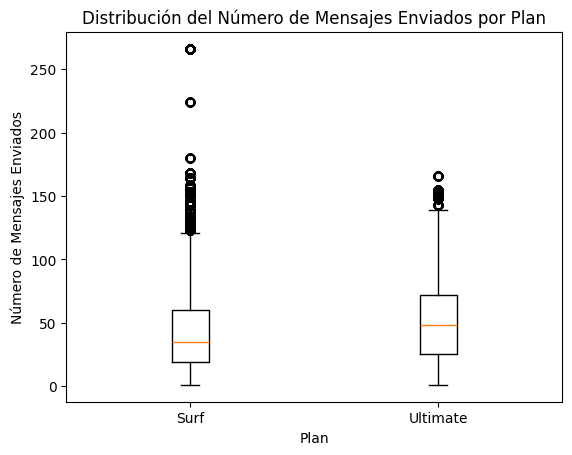

In [41]:
# Crea una lista con los mensajes enviados para cada plan
messages_monthly_distribution = [surf_users['messages_sent'], ultimate_users['messages_sent']]

# Traza un diagrama de caja para visualizar la distribución del número de mensajes enviados por plan
plt.boxplot(messages_monthly_distribution , vert=True, labels=['Surf', 'Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes Enviados')
plt.title('Distribución del Número de Mensajes Enviados por Plan')

# Muestra el gráfico
plt.show()

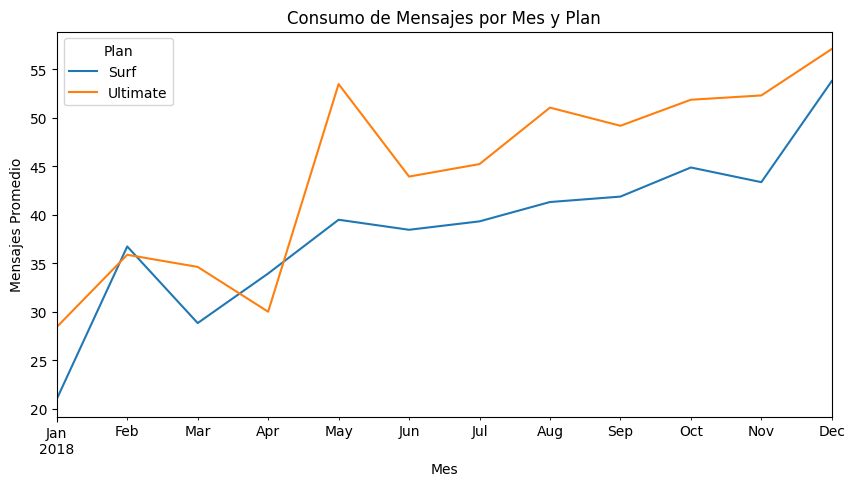

In [42]:
# Consumo de mensajes
# Llama al promedio mensual de mensajes utilizados para los planes "Surf" y "Ultimate" y crea un gráfico de línea

avg_messages_df.plot(kind='line',
                     title='Consumo de Mensajes por Mes y Plan',
                     xlabel='Mes',
                     ylabel='Mensajes Promedio',
                     figsize=(10, 5))

# Agrega una leyenda al gráfico para identificar los planes
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico en la pantalla
plt.show()

In [46]:
# Descripción estadística del consumo de mensajes por plan 'Surf'
surf_messages_consumption_stats = surf_users[['messages_sent']].describe()

# Descripción estadística del consumo de mensajes por plan 'Ultimate'
ultimate_messages_consumption_stats = ultimate_users[['messages_sent']].describe()

# Imprimir resultados
print("Descripción estadística del consumo de mensajes por plan 'Surf':")
print(surf_messages_consumption_stats)

print("\nDescripción estadística del consumo de mensajes por plan 'Ultimate':")
print(ultimate_messages_consumption_stats)

Descripción estadística del consumo de mensajes por plan 'Surf':
       messages_sent
count   73392.000000
mean       44.430101
std        35.857357
min         1.000000
25%        19.000000
50%        35.000000
75%        60.000000
max       266.000000

Descripción estadística del consumo de mensajes por plan 'Ultimate':
       messages_sent
count   36064.000000
mean       50.975987
std        34.166013
min         1.000000
25%        25.000000
50%        48.000000
75%        72.000000
max       166.000000


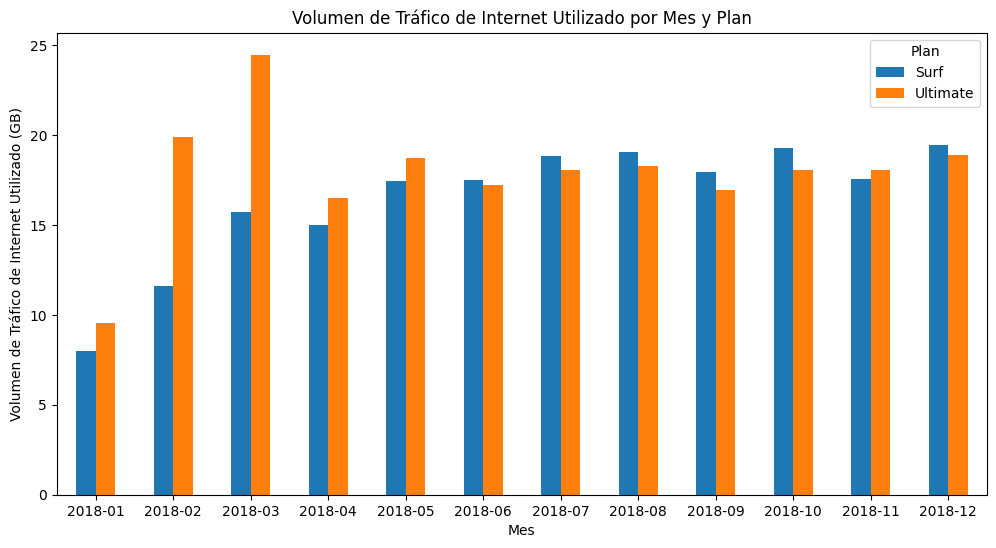

In [47]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Calcula el promedio mensual del volumen de tráfico de Internet utilizado para cada plan
surf_internet_data_used = surf_users.groupby('month_year')['internet_data_used'].mean()
ultimate_internet_data_used = ultimate_users.groupby('month_year')['internet_data_used'].mean()

# Crea un DataFrame para los resultados
internet_data_used_df = pd.DataFrame({'Surf Internet Data Used (GB)': surf_internet_data_used.values, 'Ultimate Internet Data Used (GB)': ultimate_internet_data_used.values},
                                     index=surf_internet_data_used.index)

# Trazar un gráfico de barras para visualizar la comparación
internet_data_used_df.plot(kind='bar',
                           xlabel='Mes',
                           ylabel='Volumen de Tráfico de Internet Utilizado (GB)',
                           title='Volumen de Tráfico de Internet Utilizado por Mes y Plan',
                           rot=0,
                           figsize=(12, 6))

# Agrega una leyenda al gráfico
plt.legend(title='Plan', labels=['Surf', 'Ultimate']) 

# Muestra el gráfico
plt.show() 

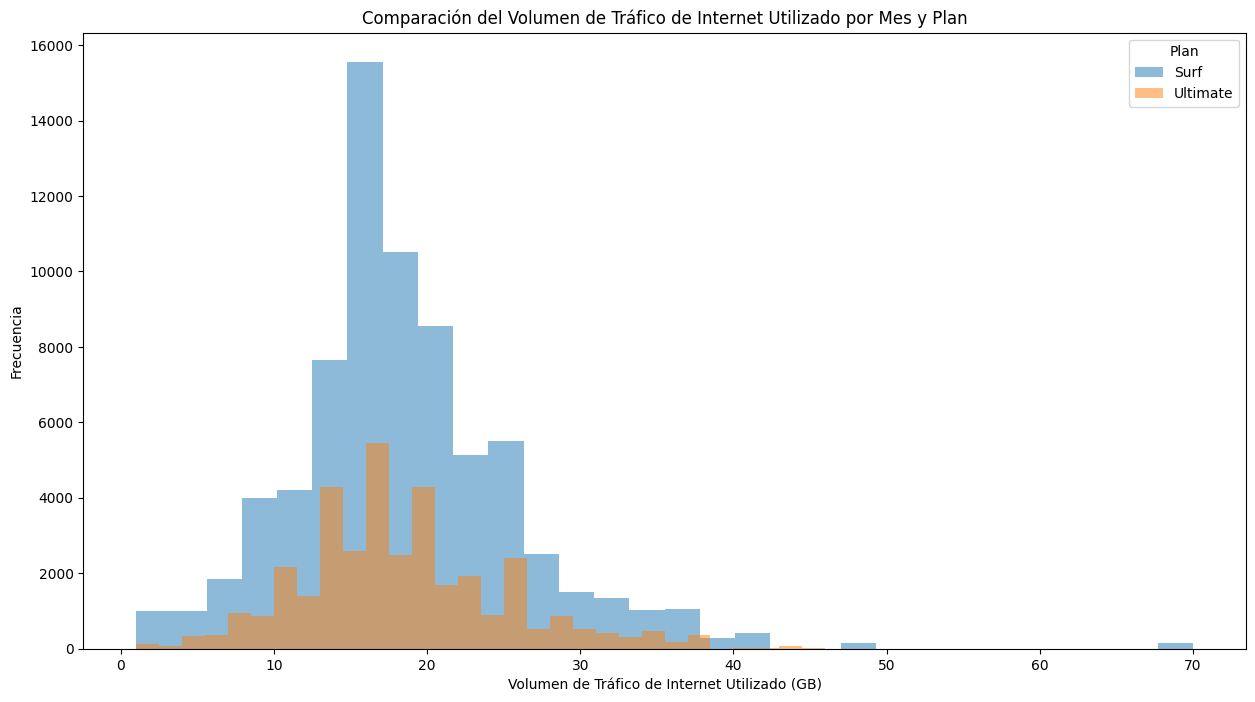

In [48]:
# Compara el volumen de tráfico de Internet utilizado por usuarios de cada plan mediante histogramas
# Traza un histograma para los usuarios del plan "Surf"
surf_users['internet_data_used'].plot(kind='hist',
                                      bins=30,
                                      alpha=0.5,
                                      title='Comparación del Volumen de Tráfico de Internet Utilizado por Mes y Plan',
                                      xlabel='Volumen de Tráfico de Internet Utilizado (GB)',
                                      ylabel='Frecuencia',
                                      figsize=(15, 8))

# Traza un histograma para los usuarios del plan "Ultimate"
ultimate_users['internet_data_used'].plot(kind='hist',
                                          bins=30,
                                          alpha=0.5,
                                          title='Comparación del Volumen de Tráfico de Internet Utilizado por Mes y Plan',
                                          xlabel='Volumen de Tráfico de Internet Utilizado (GB)',
                                          ylabel='Frecuencia',
                                          figsize=(15, 8))

# Agrega una leyenda al gráfico
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico
plt.show()

In [49]:
# Calcula la media y la varianza del volumen mensual de tráfico de Internet utilizado por cada plan
# Calcula la media del volumen de tráfico de Internet utilizado para el plan "Surf"
surf_mean_internet_data_used = surf_users['internet_data_used'].mean()

# Calcula la media del volumen de tráfico de Internet utilizado para el plan "Ultimate"
ultimate_mean_internet_data_used = ultimate_users['internet_data_used'].mean()

# Calcula la varianza del volumen de tráfico de Internet utilizado para el plan "Surf"
surf_variance_internet_data_used = surf_users['internet_data_used'].var()

# Calcula la varianza del volumen de tráfico de Internet utilizado para el plan "Ultimate"
ultimate_variance_internet_data_used = ultimate_users['internet_data_used'].var()

# Imprime los resultados
print(f'Media de volumen de tráfico de Internet utilizado para el plan Surf: {surf_mean_internet_data_used:.2f} GB')
print(f'Media de volumen de tráfico de Internet utilizado para el plan Ultimate: {ultimate_mean_internet_data_used:.2f} GB')
print(f'Varianza de volumen de tráfico de Internet utilizado para el plan Surf: {surf_variance_internet_data_used:.2f} GB^2')
print(f'Varianza de volumen de tráfico de Internet utilizado para el plan Ultimate: {ultimate_variance_internet_data_used:.2f} GB^2')

Media de volumen de tráfico de Internet utilizado para el plan Surf: 18.44 GB
Media de volumen de tráfico de Internet utilizado para el plan Ultimate: 18.16 GB
Varianza de volumen de tráfico de Internet utilizado para el plan Surf: 54.83 GB^2
Varianza de volumen de tráfico de Internet utilizado para el plan Ultimate: 44.87 GB^2


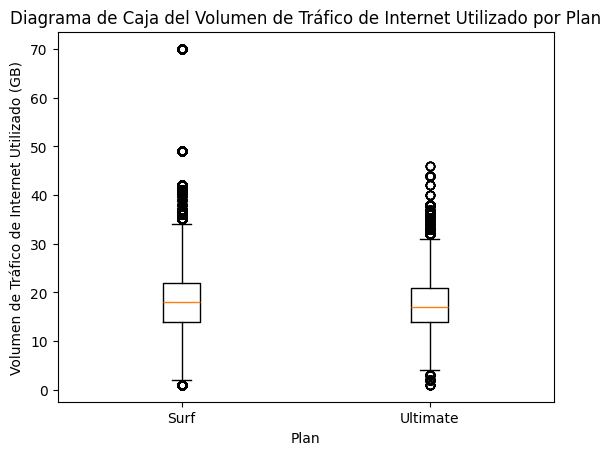

In [50]:
# Crea una lista con el tráfico de Internet utilizado para cada plan

# Crea una lista que contiene el tráfico de Internet utilizado mensualmente para el plan "Surf" y el plan "Ultimate"
internet_monthly_distribution = [surf_users['internet_data_used'], ultimate_users['internet_data_used']]

# Crea un diagrama de caja (boxplot) para visualizar la distribución del tráfico de Internet utilizado por cada plan
plt.boxplot(internet_monthly_distribution, vert=True, labels=['Surf', 'Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Volumen de Tráfico de Internet Utilizado (GB)')
plt.title('Diagrama de Caja del Volumen de Tráfico de Internet Utilizado por Plan')

# Muestra el gráfico
plt.show()

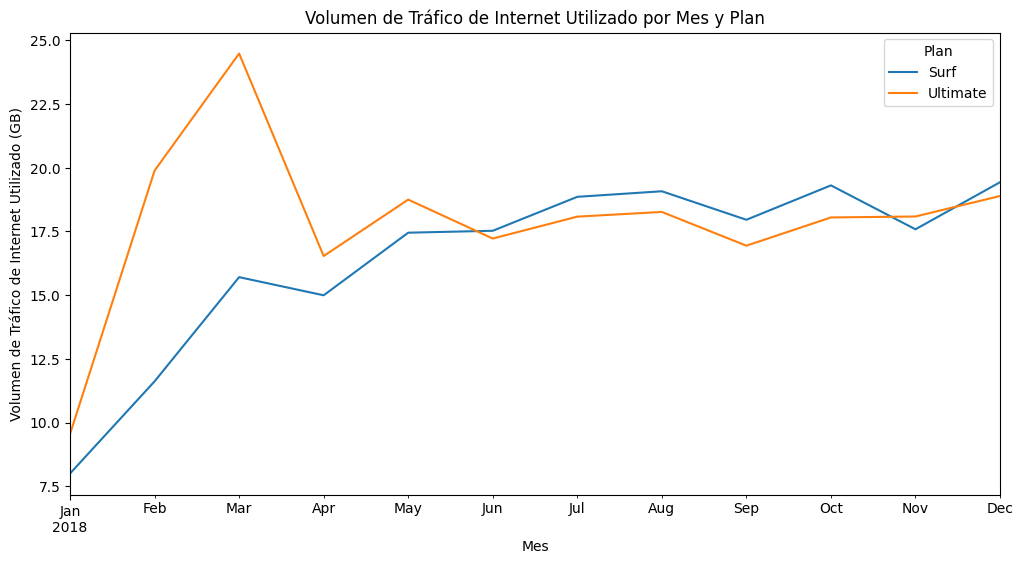

In [51]:
# Consumo de internet
# Llama al DataFrame del promedio mensual de internet utilizados para los planes "Surf" y "Ultimate" y crea un gráfico de línea
internet_data_used_df.plot(kind='line',
                           xlabel='Mes',
                           ylabel='Volumen de Tráfico de Internet Utilizado (GB)',
                           title='Volumen de Tráfico de Internet Utilizado por Mes y Plan',
                           rot=0,
                           figsize=(12, 6))

# Agrega una leyenda al gráfico
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico
plt.show()

In [53]:
# Descripción estadística del consumo de internet por plan 'Surf'
surf_internet_consumption_stats = surf_users[['internet_data_used']].describe()

# Descripción estadística del consumo de internet por plan 'Ultimate'
ultimate_internet_consumption_stats = ultimate_users[['internet_data_used']].describe()

# Imprimir resultados
print("Descripción estadística del consumo de internet por plan 'Surf':")
print(surf_internet_consumption_stats)

print("\nDescripción estadística del consumo de internet por plan 'Ultimate':")
print(ultimate_internet_consumption_stats)

Descripción estadística del consumo de internet por plan 'Surf':
       internet_data_used
count        73392.000000
mean            18.444531
std              7.404544
min              1.000000
25%             14.000000
50%             18.000000
75%             22.000000
max             70.000000

Descripción estadística del consumo de internet por plan 'Ultimate':
       internet_data_used
count        36064.000000
mean            18.159356
std              6.698773
min              1.000000
25%             14.000000
50%             17.000000
75%             21.000000
max             46.000000


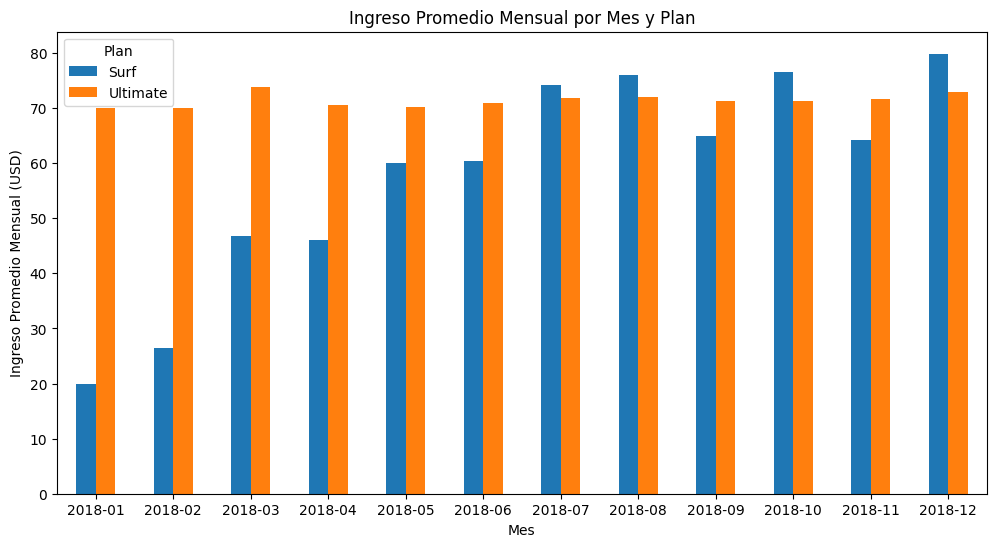

In [54]:
# Compara los ingresos promedio mensuales por plan

# Calcula el ingreso promedio mensual para los usuarios del plan "Surf"
surf_avg_income = surf_users.groupby('month_year')['total_income'].mean()

# Calcula el ingreso promedio mensual para los usuarios del plan "Ultimate"
ultimate_avg_income = ultimate_users.groupby('month_year')['total_income'].mean()

# Crea un DataFrame que contiene los ingresos promedio mensuales para ambos planes
avg_income_df = pd.DataFrame({'Surf Avg Income': surf_avg_income.values, 
                              'Ultimate Avg Income': ultimate_avg_income.values},
                               index=surf_avg_income.index)

# Crea un gráfico de barras para visualizar la comparación de ingresos promedio mensuales por plan
avg_income_df.plot(kind='bar',
                   xlabel='Mes',
                   ylabel='Ingreso Promedio Mensual (USD)',
                   title='Ingreso Promedio Mensual por Mes y Plan',
                   rot=0,
                   figsize=(12, 6))

# Agrega una leyenda al gráfico para indicar los planes "Surf" y "Ultimate"
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico
plt.show()

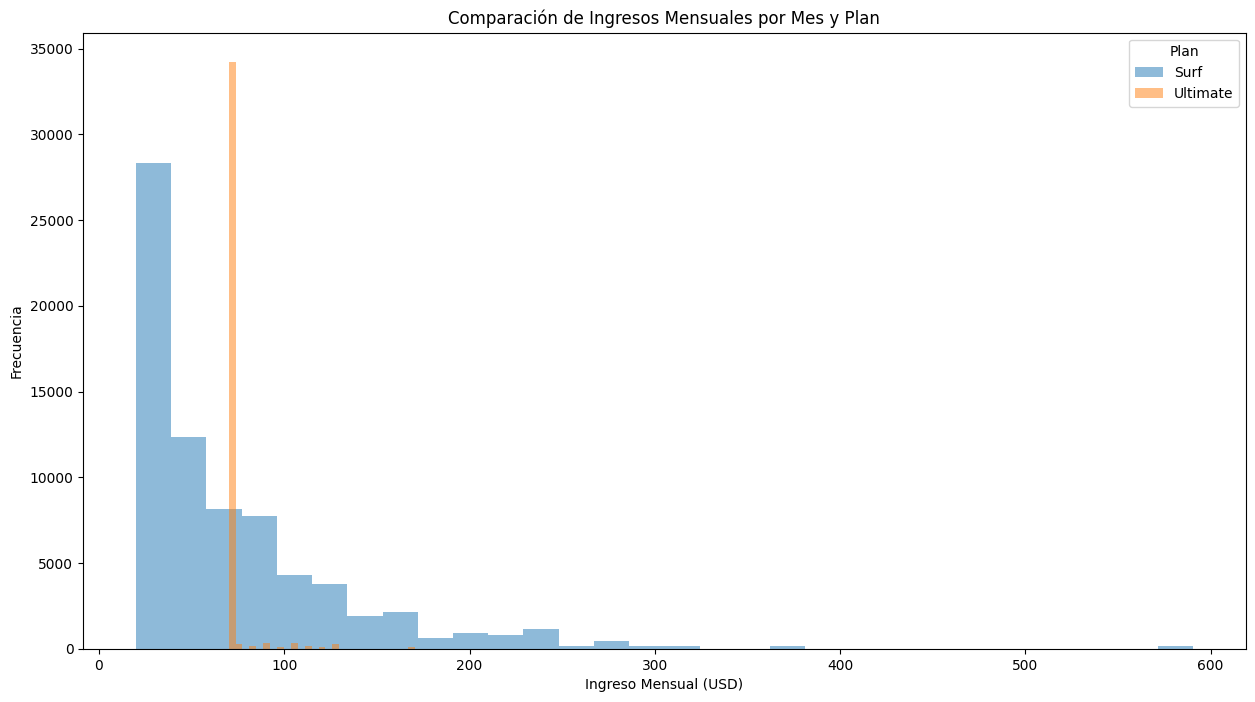

In [55]:
# Compara los ingresos mensuales por mes y plan utilizando histogramas

# Crea un histograma de los ingresos mensuales para los usuarios del plan "Surf"
surf_users['total_income'].plot(kind='hist',
                                bins=30,
                                alpha=0.5,
                                title='Comparación de Ingresos Mensuales por Mes y Plan',
                                xlabel='Ingreso Mensual (USD)',
                                ylabel='Frecuencia',
                                figsize=(15, 8))

# Crea un histograma de los ingresos mensuales para los usuarios del plan "Ultimate"
ultimate_users['total_income'].plot(kind='hist',
                                    bins=30,
                                    alpha=0.5,
                                    title='Comparación de Ingresos Mensuales por Mes y Plan',
                                    xlabel='Ingreso Mensual (USD)',
                                    ylabel='Frecuencia',
                                    figsize=(15, 8))

# Agrega una leyenda al gráfico para indicar los planes "Surf" y "Ultimate"
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico
plt.show()

In [56]:
# Calcula la media y la varianza de los ingresos mensuales para los usuarios de cada plan
# Calcula la media de los ingresos mensuales para el plan "Surf"
surf_mean_income = surf_users['total_income'].mean()

# Calcula la media de los ingresos mensuales para el plan "Ultimate"
ultimate_mean_income = ultimate_users['total_income'].mean()

# Calcula la varianza de los ingresos mensuales para el plan "Surf"
surf_variance_income = surf_users['total_income'].var()

# Calcula la varianza de los ingresos mensuales para el plan "Ultimate"
ultimate_variance_income = ultimate_users['total_income'].var()

# Imprime los resultados
print(f'Media de ingresos mensuales para el plan Surf: ${surf_mean_income:.2f}')
print(f'Media de ingresos mensuales para el plan Ultimate: ${ultimate_mean_income:.2f}')
print(f'Varianza de ingresos mensuales para el plan Surf: ${surf_variance_income:.2f}')
print(f'Varianza de ingresos mensuales para el plan Ultimate: ${ultimate_variance_income:.2f}')

Media de ingresos mensuales para el plan Surf: $70.50
Media de ingresos mensuales para el plan Ultimate: $71.74
Varianza de ingresos mensuales para el plan Surf: $3873.99
Varianza de ingresos mensuales para el plan Ultimate: $80.58


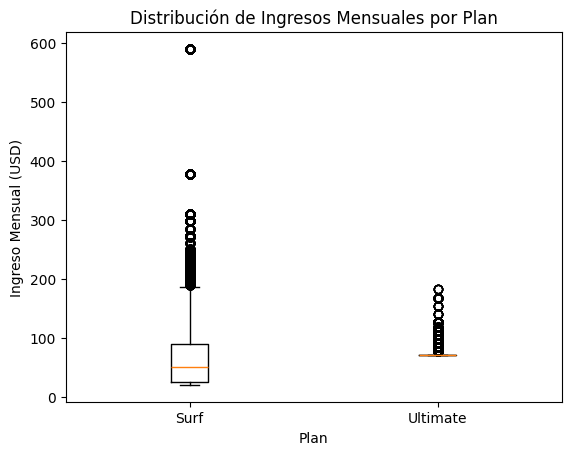

In [57]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos mensuales por plan
# Crea una lista con los ingresos mensuales de los usuarios del plan "Surf" y del plan "Ultimate"
income_monthly_distribution = [surf_users['total_income'], ultimate_users['total_income']]

# Utiliza plt.boxplot para generar el diagrama de caja
plt.boxplot(income_monthly_distribution, vert=True, labels=['Surf', 'Ultimate'])

# Establece las etiquetas del eje x y el eje y
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual (USD)')

# Establece el título del gráfico
plt.title('Distribución de Ingresos Mensuales por Plan')

# Muestra el gráfico
plt.show()

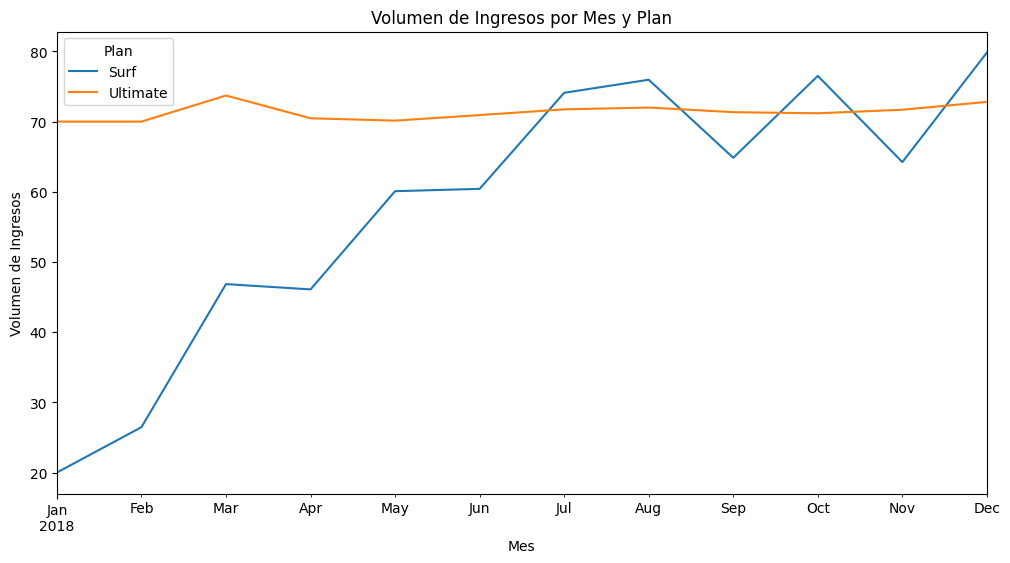

In [58]:
# Llama al DataFrame del promedio mensual de ingresos utilizados para los planes "Surf" y "Ultimate" y crea un gráfico de línea
avg_income_df.plot(kind='line',
                   xlabel='Mes',
                   ylabel='Volumen de Ingresos',
                   title='Volumen de Ingresos por Mes y Plan',
                   rot=0,
                   figsize=(12, 6))

# Agrega una leyenda al gráfico
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Muestra el gráfico
plt.show()

In [59]:
# Descripción estadística de los ingresos por plan 'Surf'
surf_income_stats = surf_users['total_income'].describe()

# Descripción estadística de los ingresos por plan 'Ultimate'
ultimate_income_stats = ultimate_users['total_income'].describe()

# Imprimir resultados
print("\nDescripción estadística de los ingresos por plan 'Surf':")
print(surf_income_stats)

print("\nDescripción estadística de los ingresos por plan 'Ultimate':")
print(ultimate_income_stats)


Descripción estadística de los ingresos por plan 'Surf':
count    73392.000000
mean        70.500386
std         62.241367
min         20.000000
25%         24.320000
50%         50.000000
75%         90.060000
max        590.370000
Name: total_income, dtype: float64

Descripción estadística de los ingresos por plan 'Ultimate':
count    36064.000000
mean        71.743595
std          8.976654
min         70.000000
25%         70.000000
50%         70.000000
75%         70.000000
max        182.000000
Name: total_income, dtype: float64


In [60]:
# Prueba las hipótesis
# Datos de ingresos para los planes Ultimate y Surf
income_ultimate = ultimate_users['total_income']
income_surf = surf_users['total_income']

# Realiza la prueba t de dos muestras independientes
t_statistic, p_value = st.ttest_ind(income_ultimate, income_surf)

alpha = 0.05

# Comprueba si rechazamos la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
    print("Hay diferencias significativas en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar que existen diferencias significativas en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.")


Rechazamos la hipótesis nula.
Hay diferencias significativas en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.


In [61]:
# Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones
# Filtra los ingresos en dos grupos: NY-NJ y otras regiones
ny_nj_income = merged_df[merged_df['region'].str.contains('NY-NJ', case=False)]['total_income']
other_income = merged_df[~merged_df['region'].str.contains('NY-NJ', case=False)]['total_income']

# Realiza la prueba t de dos muestras independientes
t_statistic, p_value = st.ttest_ind(ny_nj_income, other_income)

alpha = 0.05

# Comprueba si rechazamos la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
    print("Hay diferencias significativas en los ingresos promedio entre los usuarios del área que contiene 'NY-NJ' y los usuarios de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar que existen diferencias significativas en los ingresos promedio entre los usuarios del área que contiene 'NY-NJ' y los usuarios de otras regiones.")

Rechazamos la hipótesis nula.
Hay diferencias significativas en los ingresos promedio entre los usuarios del área que contiene 'NY-NJ' y los usuarios de otras regiones.
